In [1]:
#adapted from demo code in test_football.py
import os
import numpy as np
from os.path import abspath, exists
from scipy import sparse
import scipy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import csv


#Read in the nodes.txt and edges.txt file
#https://stackoverflow.com/questions/16989647/importing-large-tab-delimited-txt-file-into-python/16999000
with open('nodes.txt') as f:
    read = csv.reader(f, delimiter="\t")
    nodes = list(read)  

for i in range(0, len(nodes)):
    nodes[i][0]= int(nodes[i][0])
    nodes[i][2]= int(nodes[i][2])
    
#print(nodes)  
#https://stackoverflow.com/questions/39732465/how-to-read-in-a-file-and-strip-the-lines-then-split-the-values
with open('edges.txt', 'r') as f:
    edges_data = [line.strip().split() for line in f]
        



In [2]:
# spectral clustering
n = 1490
k = 40

#constuct adjacency matrix
#https://stackoverflow.com/questions/29133636/creating-a-nxn-symmetric-binary-data-matrix-in-python
A= np.zeros((n,n), dtype=int)
for edge in edges_data:
    i, j = map(int,edge)
    A[i - 1][j - 1] = 1 

#print(A)
#print(A.T)

#https://stackoverflow.com/questions/28904411/making-a-numpy-ndarray-matrix-symmetric
A= np.maximum( A, A.transpose() )

#https://note.nkmk.me/en/python-numpy-condition/
isolated_nodes = np.where(np.sum(A, axis=0) == 0)[0]

#remove from rows and columns
A = np.delete(A, isolated_nodes, axis=0)
A = np.delete(A, isolated_nodes, axis=1)

#https://stackoverflow.com/questions/32381299/python-computing-vertex-degree-matrix
D = np.diag(np.sum(A, axis=1))
#print(D)

L = D @ A @ D
L = np.array(L)
#print(L


In [3]:
# eigendecomposition
v, x= np.linalg.eig(L)
idx_sorted = np.argsort(v) # the index of eigenvalue sorted acsending

x = x[:, idx_sorted[-k:]] # select the k largest eigenvectors

#normalize eigenvectors using L2-NORM --> version from football.py contained nan values from me not preprocessing the data
#https://www.delftstack.com/howto/numpy/normalize-vector-in-python/
for i in range(k):
    x[:, i] = x[:, i] / np.linalg.norm(x[:, i])
#print(x)

/Users/mbo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


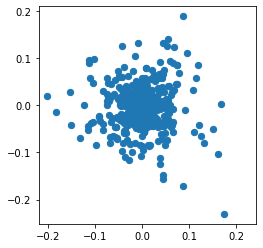

In [4]:
# scatter
plt.scatter(x[:, 0], x[:, 1], s=k)
plt.axis("square")
plt.show()

# k-means
kmeans = KMeans(n_clusters=k).fit(x.real)
c_idx = kmeans.labels_

In [5]:
#majority and mismatch label- code adapted from football.py
majority_label=[]
mismatch_label= []
for i in range(k):
    count=0
    #print(f'Cluster {i+1}\n***************')
    clusters= {}
    mismatch= {}
    idx = [index for index, t in enumerate(c_idx) if t == i]
    group= []
    for index in idx:
        group.append(nodes[index][2])
    #print(group)
    total= len(group)
    #print(total)
    clusters[i+1]= round(np.mean(group))
    majority_label.append(clusters)
    for t in range(total):
        if group[t] == round(np.mean(group)):
            count +=1
    mismatch[i+1] = round(1 - count/total, 5)
    mismatch_label.append(mismatch)
print("when k is equal to : {}" .format(k))
print("The majority label for each cluster is: {}" .format(majority_label))
print("The mismatch calc for each cluster is: {}" .format(mismatch_label))

when k is equal to : 40
The majority label for each cluster is: [{1: 1}, {2: 0}, {3: 0}, {4: 1}, {5: 1}, {6: 0}, {7: 1}, {8: 1}, {9: 1}, {10: 0}, {11: 0}, {12: 0}, {13: 1}, {14: 0}, {15: 0}, {16: 0}, {17: 0}, {18: 0}, {19: 1}, {20: 1}, {21: 1}, {22: 0}, {23: 1}, {24: 1}, {25: 0}, {26: 0}, {27: 0}, {28: 0}, {29: 0}, {30: 1}, {31: 0}, {32: 0}, {33: 1}, {34: 1}, {35: 0}, {36: 0}, {37: 1}, {38: 0}, {39: 0}, {40: 0}]
The mismatch calc for each cluster is: [{1: 0.41379}, {2: 0.10526}, {3: 0.04348}, {4: 0.0}, {5: 0.0}, {6: 0.26667}, {7: 0.23529}, {8: 0.0}, {9: 0.0}, {10: 0.0}, {11: 0.0}, {12: 0.0}, {13: 0.0}, {14: 0.0}, {15: 0.0}, {16: 0.0}, {17: 0.0}, {18: 0.39901}, {19: 0.0}, {20: 0.0}, {21: 0.0}, {22: 0.12245}, {23: 0.0}, {24: 0.0}, {25: 0.0}, {26: 0.0}, {27: 0.0}, {28: 0.0}, {29: 0.0}, {30: 0.0}, {31: 0.0}, {32: 0.0}, {33: 0.0}, {34: 0.0}, {35: 0.0}, {36: 0.0}, {37: 0.0}, {38: 0.0}, {39: 0.0}, {40: 0.0}]


In [18]:
#majority and mismatch label- code adapted from football.py
k_val= []
mismatch_rate=[]
mismatch_label=[]
for i in range(k):
    count=0
    #print(f'Cluster {i+1}\n***************')
    mismatch= []
    idx = [index for index, t in enumerate(c_idx) if t == i]
    group= []
    for index in idx:
        group.append(nodes[index][2])
    for o in range(total):
        if group[o] == round(np.mean(group)):
            count +=1
    mismatch = round(1 - count/total,5)
    mismatch_label.append(mismatch)
    mismatch_rate.append(np.mean(mismatch_label))
    k_val.append(i)
print(mismatch_rate)

[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.2857142857142857, 0.25, 0.2222222222222222, 0.2, 0.18181818181818182, 0.16666666666666666, 0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.125, 0.11764705882352941, 0.1111111111111111, 0.10526315789473684, 0.1, 0.09523809523809523, 0.09090909090909091, 0.08695652173913043, 0.08333333333333333, 0.08, 0.07692307692307693, 0.07407407407407407, 0.07142857142857142, 0.06896551724137931, 0.06666666666666667, 0.06451612903225806, 0.0625, 0.06060606060606061, 0.058823529411764705, 0.05714285714285714, 0.05555555555555555, 0.05405405405405406, 0.05263157894736842, 0.05128205128205128, 0.05]


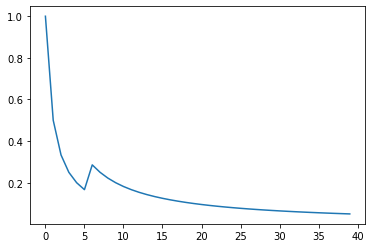

In [19]:
plt.plot(k_val, mismatch_rate)